<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Probability Density Function (PDF)
- Cummulative Density Function (CDF)
- Moments
- Intro to Programming in Python

<hr/>

### Probability Density Function
- PDF a.k.a. Probability Distribution Density Function
- Probabiliy of $x$ being between $a$ and $b$ for any $(a,b)$ is

> $\displaystyle P_{ab} = \int_a^b p(x)\,dx$

- Always 

> $\displaystyle  \int_{-\infty}^{\infty} p(x)\,dx = 1$


- Example 1: uniform distribution on $(a,b)$

> $\displaystyle  U(x;a,b) = \frac{\pmb{1}_{ab}(x)}{b\!-\!a} $,
> where $\pmb{1}_{ab}(x)$ is 1 between $a$ and $b$, but 0 otherwise

- Example 2: Gaussian or normal distribution

> $\displaystyle  G\left(x;\mu,\sigma^2\right) = \frac{{1}}{\sqrt{2\pi\sigma^2}}\ \exp\left[{-\frac{(x\!-\!\mu)^2}{2 \sigma^2} }\right]$

- Example 3: Log-normal

In [60]:
# infinity bounds is the definition of the probability distribution

### Gauss on Money!

<!--<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/DEU-10m-anv.jpg/640px-DEU-10m-anv.jpg' width=400 align=left>-->

<img src='files/640px-DEU-10m-anv.jpg' width=400 align=left>

- Even the formula

<img src='files/10DM.jpg' width=400 align=left>

### Cummulative Distribution Function
- Integral up to a given $x$: prob of being less than $x$

> $\displaystyle \mathrm{CDF}(x) = \int_{-\infty}^{x} p(t)\,dt$

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

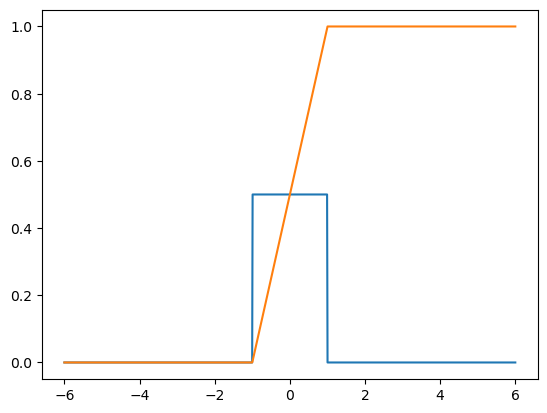

In [91]:
import scipy
from scipy.stats import uniform

# uniform distribution
a, b = -1, 1
u = uniform(a, b-a)
# u is a random variable with values between a and b
# u is an object of the class rv_continuous
# plot the pdf and cdf
x = np.linspace(-6, 6, 1000)
# print(x)

plt.plot(x, u.pdf(x));
plt.plot(x, u.cdf(x));

# u.support()

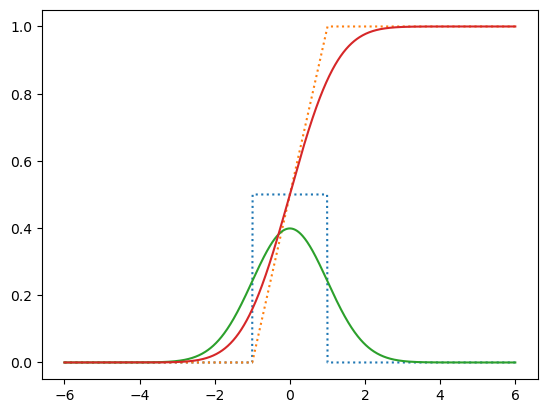

In [63]:
plt.plot(x, u.pdf(x), ':')
plt.plot(x, u.cdf(x), ':')

from scipy.stats import norm as gaussian
# rename class as gaussian

# generate a gaussian distribution with mean 0 and std 1
g = gaussian(0, 1)

# plot the pdf and cdf
plt.plot(x, g.pdf(x));
plt.plot(x, g.cdf(x));

# g.support()

(0.0, inf)

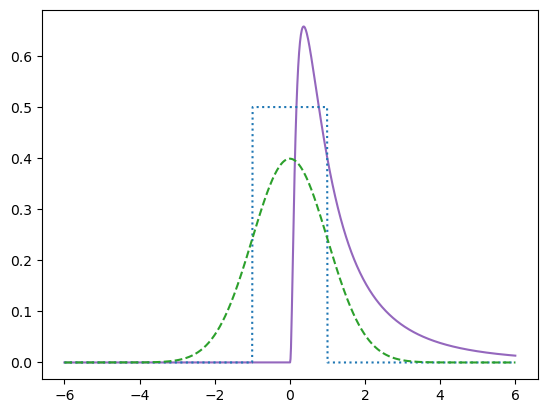

In [64]:
l = scipy.stats.lognorm(1)

plt.plot(x, l.pdf(x), color='C4')

plt.plot(x, u.pdf(x), ':', color='C0')
plt.plot(x, g.pdf(x), '--', color='C2')

l.support()

### Characterization of PDFs

- Expectation value of $X$

> $\displaystyle \mu = \mathbb{E}[X] = \int_{-\infty}^{\infty}\! x\ p(x)\,dx$

- Expectation value of any $f(X)$

> $\displaystyle \mathbb{E}[f(X)] = \int_{-\infty}^{\infty}\! f(x)\,p(x)\,dx$

- Moments 

> $\displaystyle \mathbb{E}[X^k]$
    
- Central moments 

> $\displaystyle \mathbb{E}\big[(X\!-\!\mu)^k\big]$

- Variance

> $\displaystyle \mathbb{Var}[X] = \mathbb{E}\big[(X\!-\!\mu)^2\big]$

- Standard deviation

> $\displaystyle \sigma = \sqrt{\mathbb{Var}[X]}$

- Normalized moments

> $\displaystyle \mathbb{E}\left[\left(\frac{X\!-\!\mu}{\sigma}\right)^k\right]$

- Skewness

> 3rd normalized moment ($k$=3)

- Kurtosis

> 4th normalized moment ($k$=4)
 


<img src="files/skew_kurt.png" width=400 align=left>

In [65]:
# mean, variance, skewness, kurtosis
g.stats(moments='mvsk')

(0.0, 1.0, 0.0, 0.0)

In [66]:
# mean, variance, skewness, kurtosis
# kurtosis is the fourth moment minus 3
u.stats(moments='mvsk')

(0.0, 0.3333333333333333, 0.0, -1.2)

In [67]:
l.stats(moments='mvsk')

(1.6487212707001282, 4.670774270471604, 6.184877138632554, 110.9363921763115)

In [68]:
# multiple gaussians with the same standard deviation
gaussian([0,1,2],3).stats(moments='mv')

(array([0., 1., 2.]), array([9., 9., 9.]))

<h1><font color="darkblue">Python by Examples</font></h1>

- tuple, list, function, class, for, map,  lambda, import

- numpy, matplotlib 

In [69]:
# tuple
t = (1,'asdf')
t = 100, 0.1
N, mu = t
print (N)

100


In [70]:
# list
l = [1, 2, 3, 4, 5]

# numpy array
a = np.array([l, l], dtype=np.float64)
a

array([[1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.]])

In [71]:
a.shape

(2, 5)

In [72]:
np.array(l).shape
# (5,) mean 5 elements in 1 dimension

(5,)

In [73]:
# function
def f(x, k=2):
    return x**k

f3 = f(3)
print (f3)
# this is a tuple
f(2), f(2,2), f(2,3), f(2,k=4), f3

9


(4, 4, 8, 16, 9)

In [74]:
import math

# object-oriented programming
# inherits from objects
class Robot(object):
    
    def __init__(self, name, x=0, y=0, angle=0):
        self.name, self.x, self.y, self.angle = name, x, y, angle
        self.path = [(x,y)]
    
    def move(self, l=1):
        self.x += l * math.cos(self.angle)
        self.y += l * math.sin(self.angle)
        self.path.append((self.x, self.y))
        
    def left(self, a=math.pi/2):
        self.angle += a
        
    def right(self, a=math.pi/2):
        self.left(-a)

In [75]:
r = Robot('R2D2')
r.move()    # by 1 unit


r.left()    # 90 degrees
r.move(0.2)
r.left()
r.move(0.4)
r.right(np.pi/4)
r.move()

In [76]:
r.path # complete history

[(0, 0),
 (1.0, 0.0),
 (1.0, 0.2),
 (0.6, 0.20000000000000007),
 (-0.10710678118654748, 0.9071067811865476)]

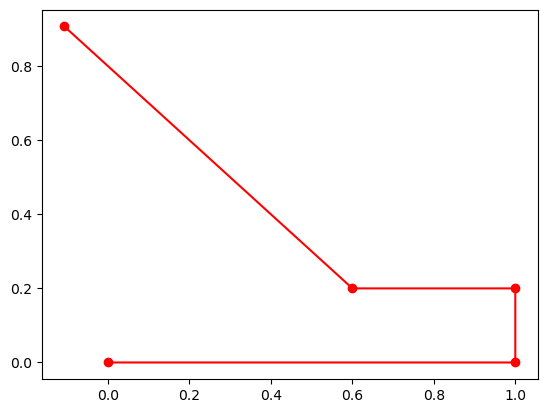

In [77]:
x, y = (c for c in zip(*r.path)) # unhomework to understand this line
plt.plot(x, y, 'ro-');

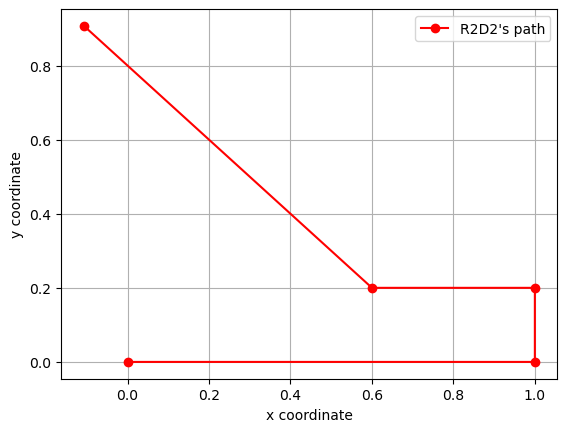

In [78]:
plt.plot(x, y, 'ro-', label=f"{r.name}'s path")
plt.legend()
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.grid()
plt.savefig('robot.png', dpi=200)
plt.savefig('robot.pdf')

In [79]:
# lambda expressions
g = lambda x: x*x
g(2)

4

In [80]:
# using standard math 
import math

math.pi, math.sin(1.57)

(3.141592653589793, 0.9999996829318346)

In [81]:
# using numpy math
np.pi, np.sin(1.57)

(3.141592653589793, 0.9999996829318346)

In [82]:
# numpy methods work also on arrays, e.g., elementwise
np.sin( [1.57, 3.14, np.pi] ) 

array([9.99999683e-01, 1.59265292e-03, 1.22464680e-16])

In [83]:
# arrays: vectors and matrices
import numpy as np

l = [1, 2, 3]
a = np.array([l, l], dtype=np.int32)

In [84]:
a

array([[1, 2, 3],
       [1, 2, 3]], dtype=int32)

In [85]:
print (a.shape)
print (a.T)

(2, 3)
[[1 1]
 [2 2]
 [3 3]]


In [86]:
[l, l]

[[1, 2, 3], [1, 2, 3]]

In [87]:
a * a 

array([[1, 4, 9],
       [1, 4, 9]], dtype=int32)

In [88]:
a.dot(a) # why does this fail?

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [ ]:
b = a.T.dot(a)
b

array([[ 2,  4,  6],
       [ 4,  8, 12],
       [ 6, 12, 18]])

In [ ]:
a.T @ a

array([[ 2,  4,  6],
       [ 4,  8, 12],
       [ 6, 12, 18]])

In [ ]:
# slicing arrays
#print (b)
b[:2,1:-1]

array([[4],
       [8]])

In [ ]:
b < 5

array([[ True,  True, False],
       [ True, False, False],
       [False, False, False]])

In [ ]:
np.logical_or(b < 5, b > 10)

array([[ True,  True, False],
       [ True, False,  True],
       [False,  True,  True]])

In [ ]:
b[b<5]

array([2, 4, 4])

In [ ]:
i,j = np.where(b < 5)

print (f'i: {i}')
print (f'j: {j}')
print (f'elements: {b[i,j]}')

i: [0 0 1]
j: [0 1 0]
elements: [2 4 4]


In [ ]:
# componentwise operations
print (np.sin(l))

# slow python loop
for s in map(math.sin, l): 
    print (s)

[0.84147098 0.90929743 0.14112001]
0.8414709848078965
0.9092974268256817
0.1411200080598672


In [ ]:
[math.sin(x*y) for x in l for y in l if x+y < 6] # little better but not numpy speed

[0.8414709848078965,
 0.9092974268256817,
 0.1411200080598672,
 0.9092974268256817,
 -0.7568024953079282,
 -0.27941549819892586,
 0.1411200080598672,
 -0.27941549819892586]